In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv files
df_weekly_cases = pd.read_csv(r"data source/cases/us weekly cases.csv", skiprows=2)
df_total_cases = pd.read_csv(r"data source/cases/us total cases.csv", skiprows=2)
df_weekly_deaths = pd.read_csv(r"data source/deaths/us weekly deaths.csv", skiprows=2)
df_total_deaths = pd.read_csv(r"data source/deaths/us total deaths.csv", skiprows=2)
df_total_vaccinations = pd.read_csv(r"data source/vaccinations/trends_in_number_of_covid19_vaccinations_in_the_us.csv", skiprows=2)

In [3]:
df_weekly_cases

,Geography,Date,Weekly Cases,New Historic Cases
0,United States,Apr 5 2023,120820,0
1,United States,Mar 29 2023,136879,5347
2,United States,Mar 22 2023,157049,18232
3,United States,Mar 15 2023,167142,347
4,United States,Mar 8 2023,186977,0
...,...,...,...,...
162,United States,Feb 26 2020,27,0
163,United States,Feb 19 2020,16,0
164,United States,Feb 12 2020,13,0
165,United States,Feb 5 2020,12,0


In [4]:
df_total_cases

,Geography,Date,Total Cases
0,United States,Apr 5 2023,104242889
1,United States,Mar 29 2023,104122069
2,United States,Mar 22 2023,103979843
3,United States,Mar 15 2023,103804562
4,United States,Mar 8 2023,103637073
...,...,...,...
162,United States,Feb 26 2020,80
163,United States,Feb 19 2020,53
164,United States,Feb 12 2020,37
165,United States,Feb 5 2020,24


In [5]:
df_weekly_deaths

,Geography,Date,Weekly Deaths,New Historic Deaths
0,United States,Apr 5 2023,1773,0
1,United States,Mar 29 2023,1537,0
2,United States,Mar 22 2023,2261,0
3,United States,Mar 15 2023,1822,0
4,United States,Mar 8 2023,2078,0
...,...,...,...,...
162,United States,Feb 26 2020,0,0
163,United States,Feb 19 2020,0,0
164,United States,Feb 12 2020,0,0
165,United States,Feb 5 2020,0,0


In [6]:
df_total_deaths

,Geography,Date,Total Deaths
0,United States,Apr 5 2023,1127104
1,United States,Mar 29 2023,1125331
2,United States,Mar 22 2023,1123794
3,United States,Mar 15 2023,1121533
4,United States,Mar 8 2023,1119711
...,...,...,...
162,United States,Feb 26 2020,0
163,United States,Feb 19 2020,0
164,United States,Feb 12 2020,0
165,United States,Feb 5 2020,0


In [7]:
df_total_vaccinations

,Date,MMWR_week,Location,Short Name,Long Name,Percent of Total Pop with at least One Dose,Percent of People with Complete Primary Series,Total Doses Administered Daily,Daily Count People Receiving Dose 1,Total Doses Administered Cumulative,People Receiving 1 or More Doses Cumulative,7-Day Avg Daily Count Dose 1,7-Day Avg Total Doses Daily,Daily Count of People Completing a Primary Series,People with a Completed Primary Series Cumulative,7-Day Avg Daily Count of People Completing a Primary Series,Daily Count of People Receiving a Bivalent Booster Dose,People Receiving a Bivalent Booster Dose Cumulative,7-Day Avg Daily Count of People Receiving a Bivalent Booster Dose,Percent of People who Received Bivalent Booster Dose
0,2020-12-13,51,US,USA,United States,0.0,0.0,44821,36215,44821,36215,36215,44821,9499,9499,9499,0,0,0,0.0
1,2020-12-14,51,US,USA,United States,0.0,0.0,4839,4641,49660,40856,20428,24830,162,9661,4831,0,0,0,0.0
2,2020-12-15,51,US,USA,United States,0.0,0.0,47827,46373,97487,87229,29076,32496,324,9985,3328,0,0,0,0.0
3,2020-12-16,51,US,USA,United States,0.1,0.0,160063,155441,257550,242670,60668,64388,514,10499,2625,0,0,0,0.0
4,2020-12-17,51,US,USA,United States,0.2,0.0,275120,268161,532670,510831,102166,106534,819,11318,2264,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2023-03-31,13,US,USA,United States,81.3,69.4,50269,10444,674319431,270032042,9215,41463,6721,230412020,5471,37304,55315157,30725,16.7
839,2023-04-01,13,US,USA,United States,81.3,69.4,16248,3827,674335679,270035869,8936,40313,1885,230413905,5299,12959,55328116,29863,16.7
840,2023-04-02,14,US,USA,United States,81.3,69.4,8132,2545,674343811,270038414,8760,39513,847,230414752,5203,6632,55334748,29280,16.7
841,2023-04-03,14,US,USA,United States,81.3,69.4,25362,5919,674369173,270044333,8022,35786,3028,230417780,4677,19365,55354113,26585,16.7


In [8]:
#Copying the original dfs
df_wc = df_weekly_cases[['Date', 'Weekly Cases']].copy()
df_tc = df_total_cases[['Date', 'Total Cases']].copy()
df_wd = df_weekly_deaths[['Date', 'Weekly Deaths']].copy()
df_td = df_total_deaths[['Date', 'Total Deaths']].copy()
df_vaccinations = df_total_vaccinations[['Date', 'Total Doses Administered Daily']].copy()
df_vaccinations = df_vaccinations.drop(df_vaccinations.index[:3])

In [9]:
#Converting to datetime format
df_wc['Date'] = pd.to_datetime(df_wc['Date'])
df_tc['Date'] = pd.to_datetime(df_tc['Date'])
df_wd['Date'] = pd.to_datetime(df_wd['Date'])
df_td['Date'] = pd.to_datetime(df_td['Date'])
df_vaccinations['Date'] = pd.to_datetime(df_vaccinations['Date'])
df_vaccinations = df_vaccinations.set_index('Date')

In [10]:
#Turning the 'Total Doses Administered Daily' column from daily to weekly data by summing it up and resampling it
output = df_vaccinations.resample('W').apply('sum')
output.index -= pd.tseries.frequencies.to_offset('4D')

In [11]:
#Joining the dfs together
df = pd.concat([df_wc, df_tc.drop(columns=['Date']), df_wd.drop(columns=['Date']), df_td.drop(columns=['Date'])], axis=1)

In [12]:
#Reversing the entire df for legibility
df = df.iloc[::-1].reset_index(drop=True)

In [13]:
#Joing the vaccination data with the main df
df_new = df.set_index('Date').join(output)

In [14]:
#Renaming the doses column and then filling in the NaN values with 0
df_new = df_new.rename(columns = {'Total Doses Administered Daily':'Weekly Vaccinations'})
df_new = df_new.fillna(0)
df = df_new.copy()

In [15]:
#Resetting index and converting to datetime again
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])

#Convert Weekly Vaccinations from float to integer for legibility
df['Weekly Vaccinations'] = df['Weekly Vaccinations'].astype(np.int64)

In [16]:
#Final df
df

,Date,Weekly Cases,Total Cases,Weekly Deaths,Total Deaths,Weekly Vaccinations
0,2020-01-29,6,12,0,0,0
1,2020-02-05,12,24,0,0,0
2,2020-02-12,13,37,0,0,0
3,2020-02-19,16,53,0,0,0
4,2020-02-26,27,80,0,0,0
...,...,...,...,...,...,...
162,2023-03-08,186977,103637073,2078,1119711,379677
163,2023-03-15,167142,103804562,1822,1121533,349817
164,2023-03-22,157049,103979843,2261,1123794,331374
165,2023-03-29,136879,104122069,1537,1125331,276592


In [17]:
dfsummary = df.describe().round(1)
dfsummary

,Weekly Cases,Total Cases,Weekly Deaths,Total Deaths,Weekly Vaccinations
count,167.0,167.0,167.0,167.0,167.0
mean,623731.2,48614106.5,6724.6,641464.7,4037591.1
std,799569.9,37170691.2,5405.8,378152.5,5203257.5
min,6.0,12.0,0.0,0.0,0.0
25%,244506.0,10935938.5,2666.5,251374.0,0.0
50%,412925.0,39485058.0,4975.0,647707.0,2110911.0
75%,729316.5,86277760.0,9616.5,1010546.5,5630011.0
max,5504701.0,104242889.0,23629.0,1127104.0,24549812.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 167 non-null    datetime64[ns]
 1   Weekly Cases         167 non-null    int64         
 2   Total Cases          167 non-null    int64         
 3   Weekly Deaths        167 non-null    int64         
 4   Total Deaths         167 non-null    int64         
 5   Weekly Vaccinations  167 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 8.0 KB


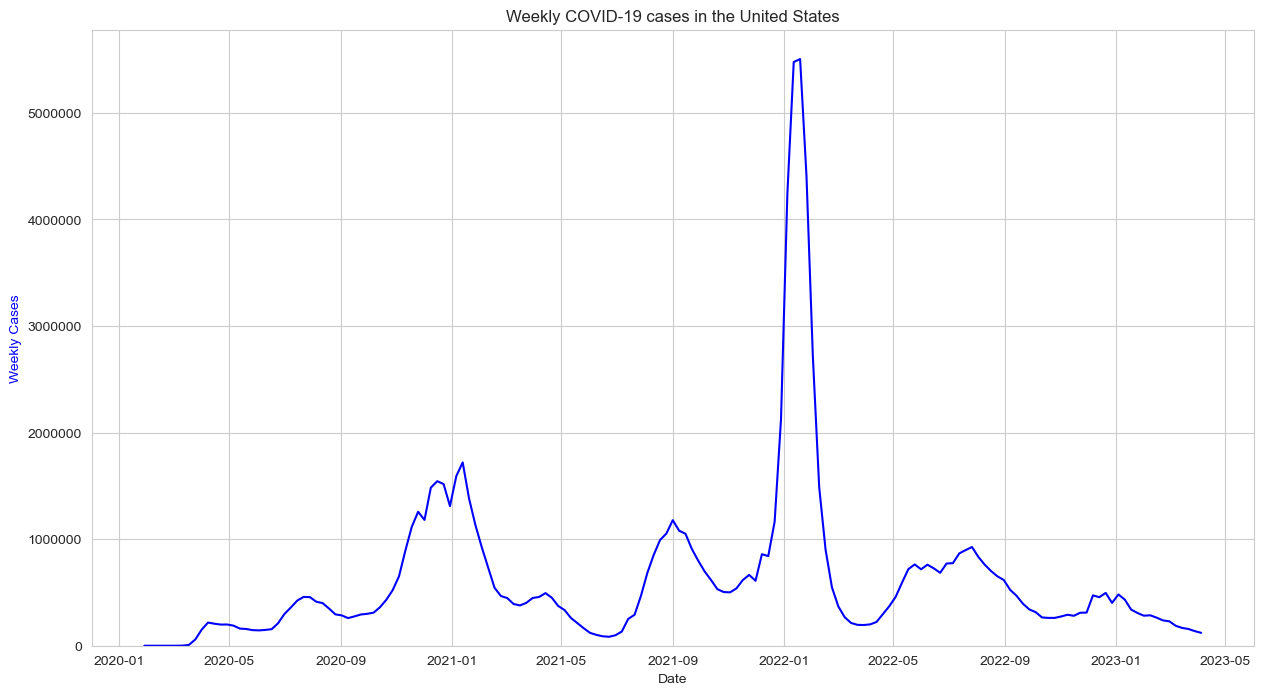

In [19]:
#Lineplot of Weekly Cases over time
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data = df, x = 'Date', y = 'Weekly Cases', color='blue').set(title='Weekly COVID-19 cases in the United States')
ax.ticklabel_format(style='plain', axis = 'y')
ax.set_ylabel('Weekly Cases', color='b')
plt.ylim(bottom=0)
plt.show()

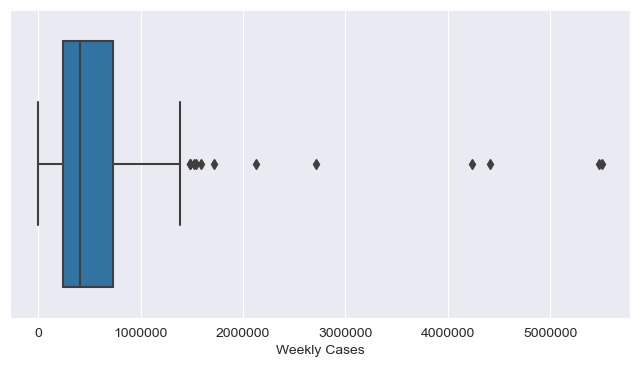

In [20]:
#Boxplot of Weekly Cases showing outliers and the quartiles
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data = df, x = 'Weekly Cases')
ax.ticklabel_format(style='plain', axis = 'x')
plt.show()

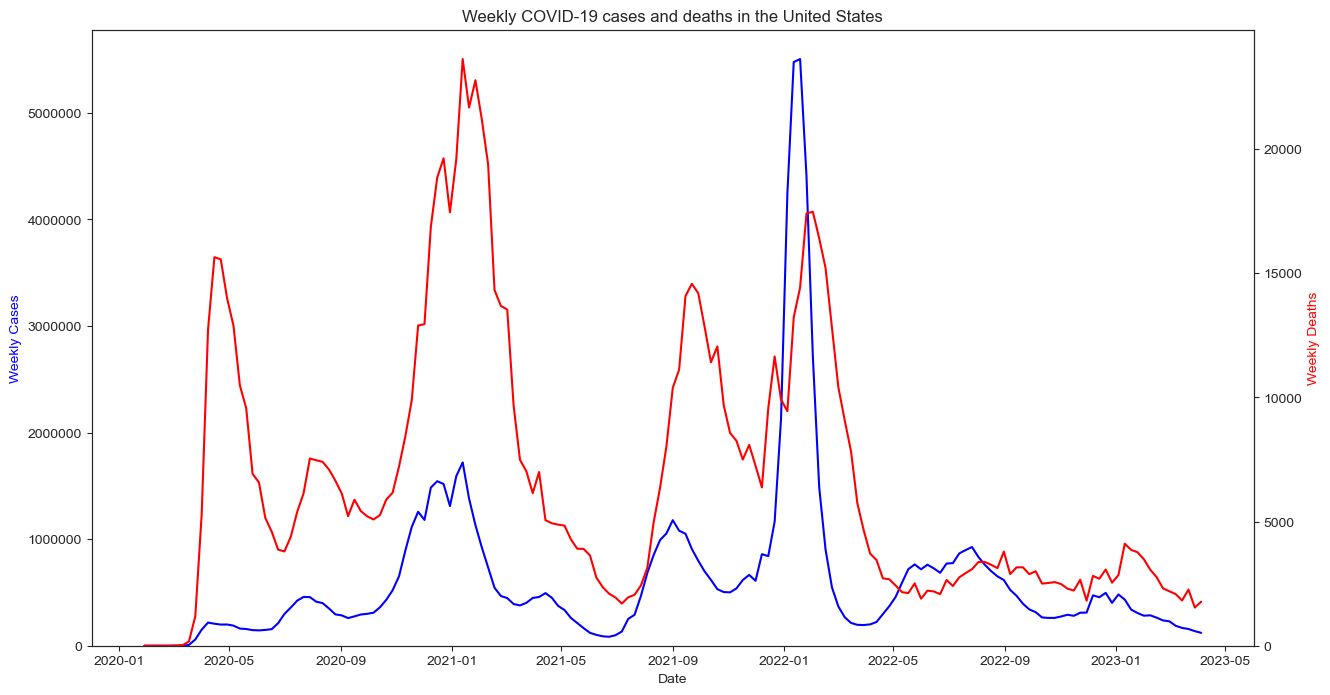

In [21]:
#Lineplot of Weekly Cases vs Deaths over time
sns.set_style('ticks')
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Date', y = 'Weekly Cases', ax = ax1, color='blue').set(title='Weekly COVID-19 cases and deaths in the United States')
sns.lineplot(data = df, x = 'Date', y = 'Weekly Deaths', ax = ax2, color='red')
ax1.ticklabel_format(style='plain', axis = 'y')
ax1.set_ylabel('Weekly Cases', color='b')
ax2.set_ylabel('Weekly Deaths', color='r')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()

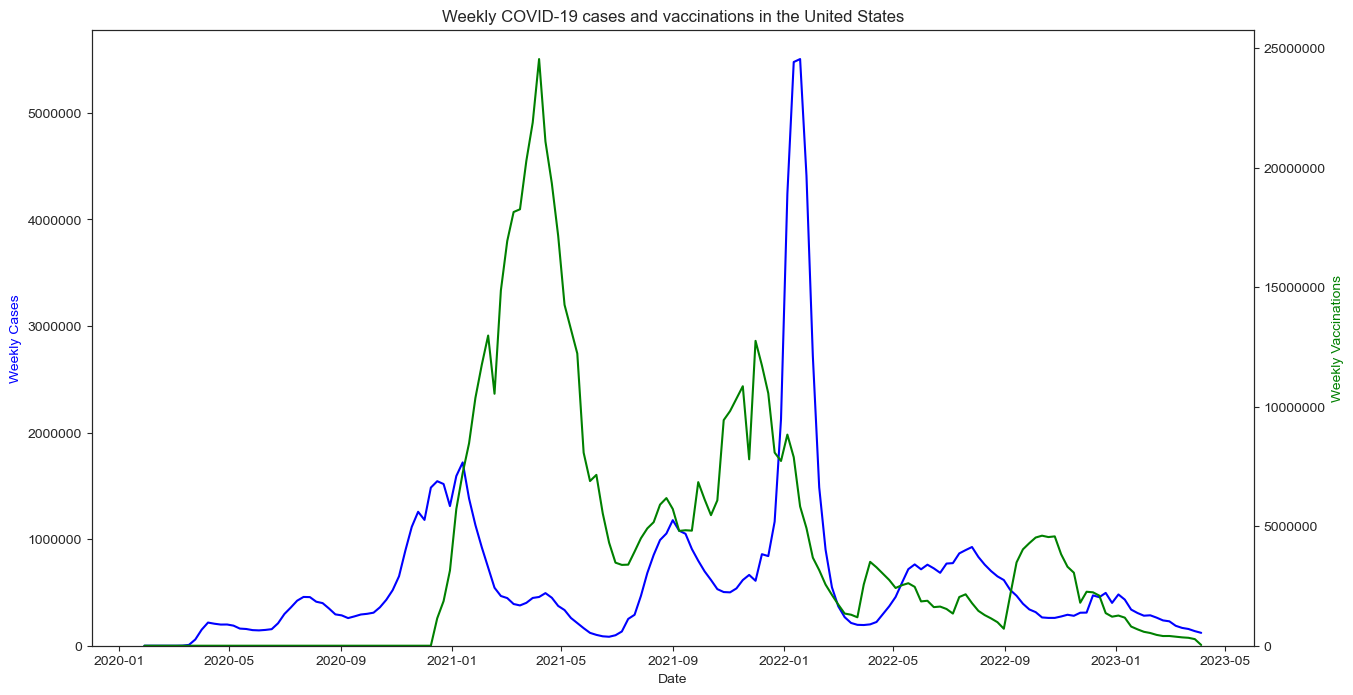

In [22]:
#Lineplot of Weekly Cases vs Vaccinations over time
sns.set_style('ticks')
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Date', y = 'Weekly Cases', ax = ax1, color='blue').set(title='Weekly COVID-19 cases and vaccinations in the United States')
sns.lineplot(data = df, x = 'Date', y = 'Weekly Vaccinations', ax = ax2, color='green')
ax1.ticklabel_format(style='plain', axis = 'y')
ax2.ticklabel_format(style='plain', axis = 'y')
ax1.set_ylabel('Weekly Cases', color='b')
ax2.set_ylabel('Weekly Vaccinations', color='g')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()

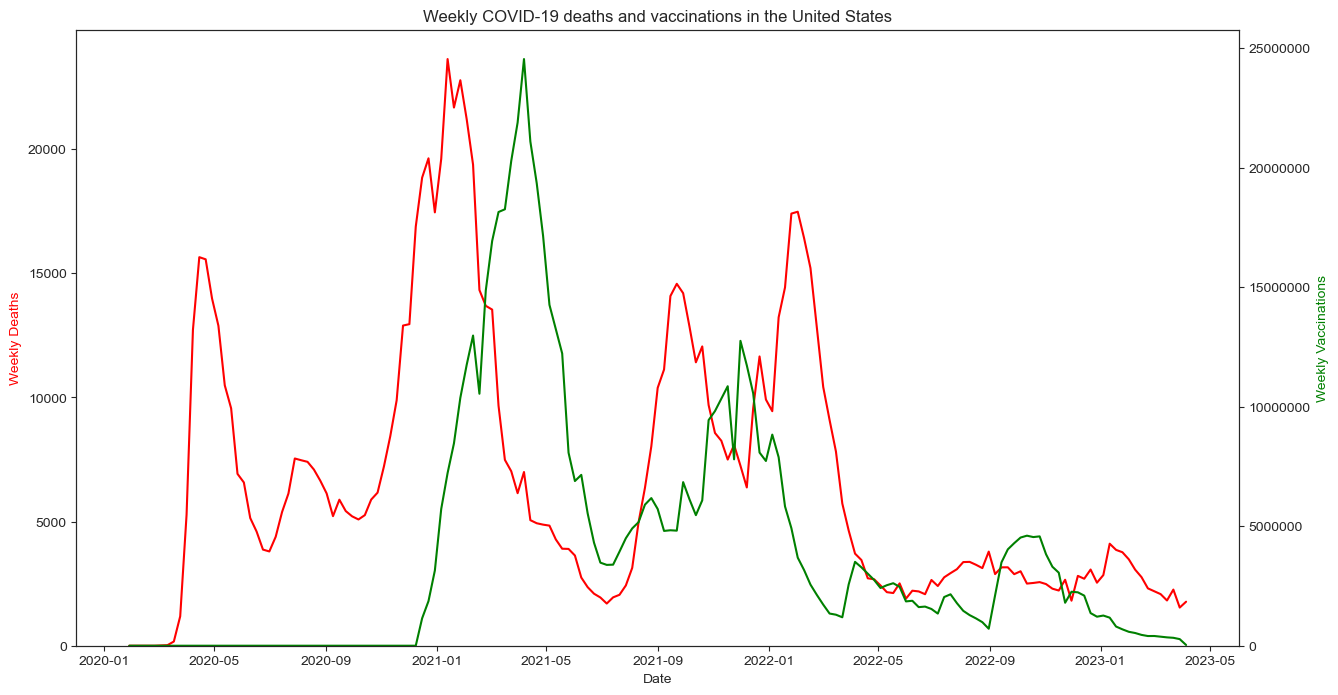

In [23]:
#Lineplot of Weekly Deaths vs Vaccinations over time
sns.set_style('ticks')
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Date', y = 'Weekly Deaths', ax = ax1, color='red').set(title='Weekly COVID-19 deaths and vaccinations in the United States')
sns.lineplot(data = df, x = 'Date', y = 'Weekly Vaccinations', ax = ax2, color='green')
ax1.ticklabel_format(style='plain', axis = 'y')
ax2.ticklabel_format(style='plain', axis = 'y')
ax1.set_ylabel('Weekly Deaths', color='r')
ax2.set_ylabel('Weekly Vaccinations', color='g')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()

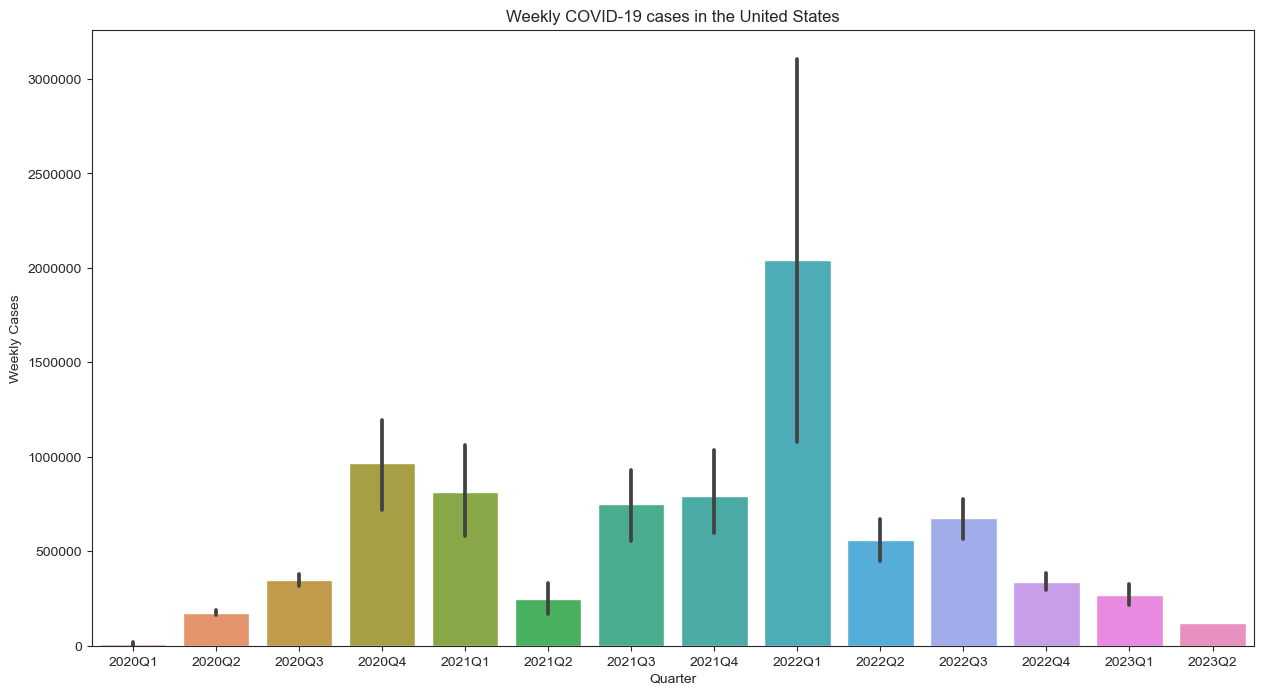

In [24]:
#Barplot of Weekly Cases set to quarters
dfbar = df.copy()
dfbar['Quarter'] = dfbar.Date.dt.to_period('Q')
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data = dfbar, x = 'Quarter', y = 'Weekly Cases').set(title='Weekly COVID-19 cases in the United States')
ax.ticklabel_format(style='plain', axis = 'y')
plt.show()

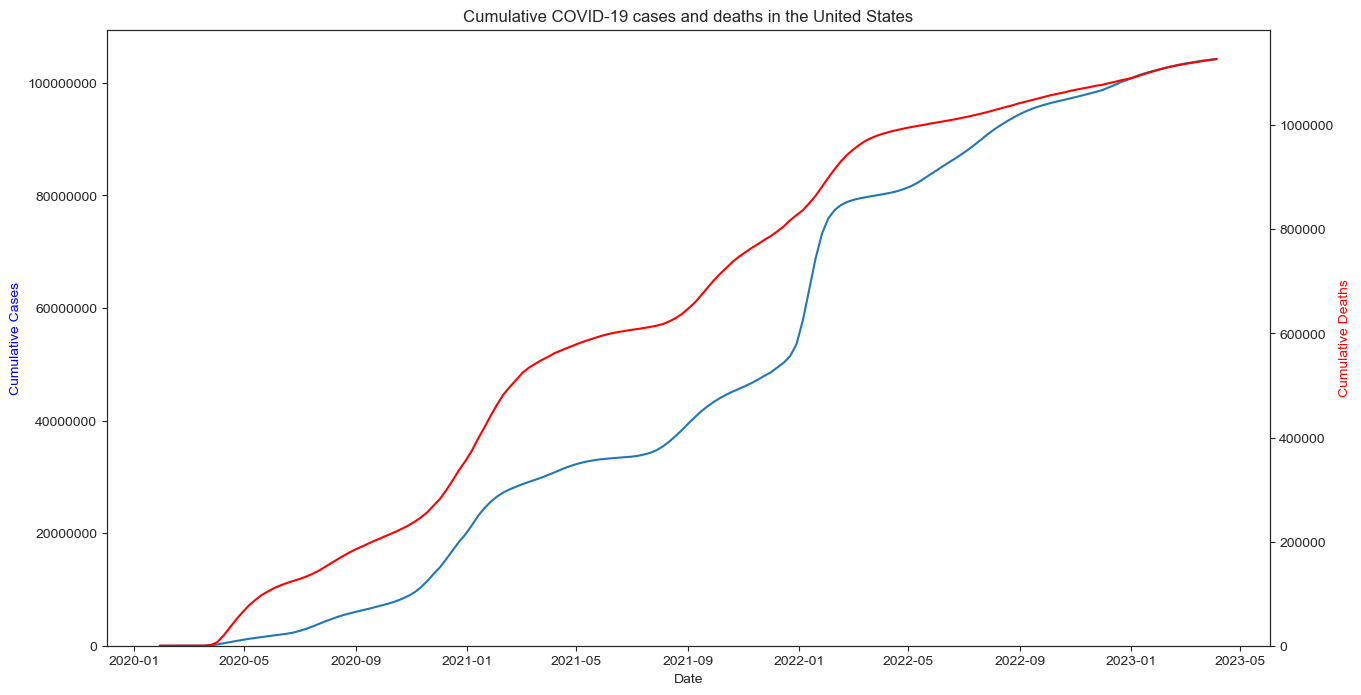

In [25]:
#Lineplot of Cumulative Cases vs Deaths over time
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()
sns.lineplot(data = df, x = 'Date', y = 'Total Cases', ax = ax1).set(title='Cumulative COVID-19 cases and deaths in the United States')
sns.lineplot(data = df, x = 'Date', y = 'Total Deaths', ax = ax2, color='red')
ax1.ticklabel_format(style='plain', axis = 'y')
ax2.ticklabel_format(style='plain', axis = 'y')
ax1.set_ylabel('Cumulative Cases', color='b')
ax2.set_ylabel('Cumulative Deaths', color='r')
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
plt.show()

In [26]:
#For measuring correlation, create a copy of the df where the first entry of Weekly Vaccinations is > 0
df_r = df.iloc[46:].copy()
df_r = df_r.reset_index(drop=True)
df_r

,Date,Weekly Cases,Total Cases,Weekly Deaths,Total Deaths,Weekly Vaccinations
0,2020-12-16,1543674,16958083,18853,317896,1147320
1,2020-12-23,1517264,18475347,19631,337527,1867158
2,2020-12-30,1310257,19785604,17454,354981,3147091
3,2021-01-06,1592219,21377823,19611,374592,5722767
4,2021-01-13,1720019,23097842,23629,398221,7226158
...,...,...,...,...,...,...
116,2023-03-08,186977,103637073,2078,1119711,379677
117,2023-03-15,167142,103804562,1822,1121533,349817
118,2023-03-22,157049,103979843,2261,1123794,331374
119,2023-03-29,136879,104122069,1537,1125331,276592


[]

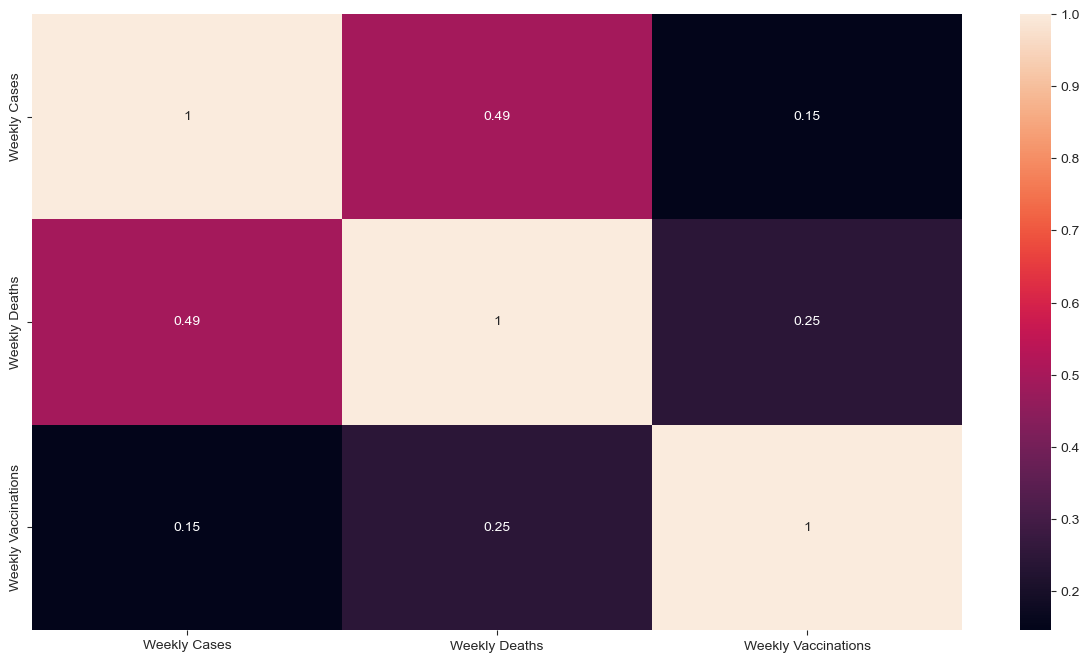

In [27]:
#Correlation of all the weekly features
dfc = df[['Date', 'Weekly Cases', 'Weekly Deaths', 'Weekly Vaccinations']].copy()
fig, ax = plt.subplots(figsize=(15, 8))
correlation = dfc.corr()
sns.heatmap(correlation, annot = True)
plt.plot()

[]

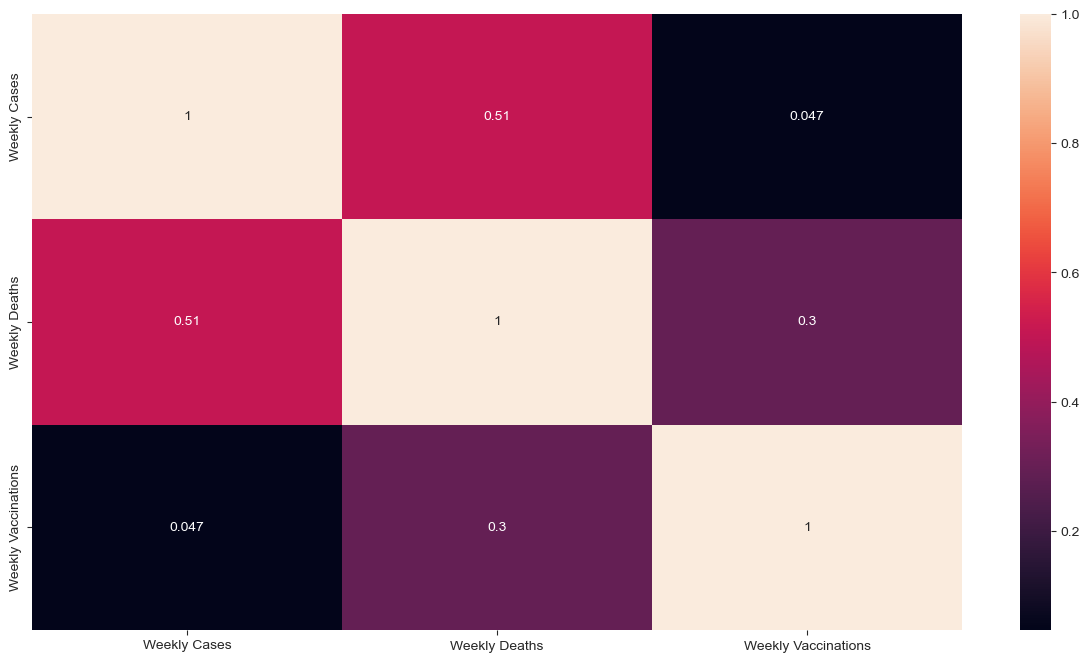

In [28]:
#Correlation of all the weekly features but excluding the dates when vaccinations weren't available yet
df_r2 = df_r[['Date', 'Weekly Cases', 'Weekly Deaths', 'Weekly Vaccinations']].copy()
fig, ax = plt.subplots(figsize=(15, 8))
correlation = df_r2.corr()
sns.heatmap(correlation, annot = True)
plt.plot()

In [29]:
#New df with only Weekly Cases within 1 year from the end of the dataframe
df_wc_ts = df.drop(columns = ['Total Cases', 'Weekly Deaths', 'Total Deaths', 'Weekly Vaccinations'])
df_wc_ts = df_wc_ts.iloc[114:167]
df_wc_ts = df_wc_ts.reset_index(drop=True)

In [30]:
#Preparing the 1 year df for Prophet
df_wc_fb = df_wc_ts.rename(columns = {'Date':'ds', 'Weekly Cases':'y'})
df_wc_fb.head()

,ds,y
0,2022-04-06,200334
1,2022-04-13,222684
2,2022-04-20,296479
3,2022-04-27,370135
4,2022-05-04,457462


In [31]:
df_wc_fb.tail()

,ds,y
48,2023-03-08,186977
49,2023-03-15,167142
50,2023-03-22,157049
51,2023-03-29,136879
52,2023-04-05,120820


In [32]:
#Log transformation
df_ts_log = df_wc_fb.copy()
df_ts_log['y_log'] = np.log(df_ts_log['y'])
df_ts_log = df_ts_log.drop('y', axis=1).rename(columns={'y_log':'y'})
df_ts_log.head()

,ds,y
0,2022-04-06,12.207741
1,2022-04-13,12.313509
2,2022-04-20,12.599732
3,2022-04-27,12.821623
4,2022-05-04,13.033449


In [33]:
df_ts_log.tail()

,ds,y
48,2023-03-08,12.138741
49,2023-03-15,12.026599
50,2023-03-22,11.964313
51,2023-03-29,11.826853
52,2023-04-05,11.702057


In [34]:
#Importing Prophet modules
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from itertools import product

In [35]:
#Fitting the first data (no changes made)
model = Prophet()
model.fit(df_wc_fb)
model_cv = cross_validation(model=model, initial='200 days', period='28 days', horizon = '28 days', parallel="processes")
model_p = performance_metrics(model_cv, rolling_window=1)
model_p

21:50:27 - cmdstanpy - INFO - Chain [1] start processing
21:50:27 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,28 days,9.169307e+09,95756.498074,90970.637282,0.391237,0.322293,0.314305,1.0


In [36]:
model_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
15,2023-03-08,316536.475441,79628.374892,578231.072402,186977,2023-02-08
16,2023-03-15,277428.668268,40104.506074,499721.622967,167142,2023-03-08
17,2023-03-22,269381.051333,51507.458366,497719.282306,157049,2023-03-08
18,2023-03-29,261333.434398,31161.361295,503381.461650,136879,2023-03-08
19,2023-04-05,253285.817463,24231.418545,490077.048197,120820,2023-03-08


In [37]:
#Fitting the log-transformed data
model_log = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.01)
model_log.fit(df_ts_log)
model_cv_log = cross_validation(model=model_log, initial='200 days', period='28 days', horizon = '28 days', parallel="processes")
model_p_log = performance_metrics(model_cv_log, rolling_window=1)
model_p_log

21:50:30 - cmdstanpy - INFO - Chain [1] start processing
21:50:30 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,28 days,0.145867,0.381926,0.282649,0.02232,0.014314,0.02214,0.4


In [38]:
model_cv_log.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
15,2023-03-08,12.316630,11.927507,12.694305,12.138741,2023-02-08
16,2023-03-15,12.111733,12.041151,12.180565,12.026599,2023-03-08
17,2023-03-22,12.027099,11.936996,12.129471,11.964313,2023-03-08
18,2023-03-29,11.942465,11.786801,12.110951,11.826853,2023-03-08
19,2023-04-05,11.857830,11.622913,12.121110,11.702057,2023-03-08


In [39]:
#Inverse log-transform
model_cv_invlog = model_cv_log.copy()
model_cv_invlog['yhat'] = np.exp(model_cv_invlog['yhat'])
model_cv_invlog['yhat_lower'] = np.exp(model_cv_invlog['yhat_lower'])
model_cv_invlog['yhat_upper'] = np.exp(model_cv_invlog['yhat_upper'])
model_cv_invlog['y'] = np.exp(model_cv_invlog['y'])

In [40]:
model_cv_invlog.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
15,2023-03-08,223380.017152,151373.713431,325886.570393,186977.0,2023-02-08
16,2023-03-15,181994.813224,169591.950905,194962.925671,167142.0,2023-03-08
17,2023-03-22,167225.594675,152816.889278,185251.836684,157049.0,2023-03-08
18,2023-03-29,153654.925758,131505.047516,181852.437262,136879.0,2023-03-08
19,2023-04-05,141185.541937,111626.412593,183709.255856,120820.0,2023-03-08


In [41]:
#Predictions of first model
future = model.make_future_dataframe(periods=12, freq='W')
future.tail()

,ds
60,2023-05-28
61,2023-06-04
62,2023-06-11
63,2023-06-18
64,2023-06-25


In [42]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60,2023-05-28,150668.926878,-75958.850728,373283.785674
61,2023-06-04,141659.098112,-78296.995744,356813.059120
62,2023-06-11,132649.269345,-114906.321942,380906.817779
63,2023-06-18,123639.440578,-105413.666598,352479.389379
64,2023-06-25,114629.611812,-129364.299526,353900.180954


In [43]:
# Parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.05, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1.0, 5, 10, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]
mapes = []
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params).fit(df_ts_log)
    # Cross-validation
    model_cv_log = cross_validation(m, initial='200 days', period='28 days', horizon = '28 days', parallel="processes")
    # Model performance
    model_p_log = performance_metrics(model_cv_log, rolling_window=0)
    # Save model performance metrics
    mapes.append(model_p_log['mape'].values[0])
# Tuning results
best_params = all_params[np.argmin(mapes)]
# Best parameters
print(best_params)
# Train model using best parameters
auto_model_log = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_log.fit(df_ts_log)
# Cross validation
auto_model_log_cv = cross_validation(auto_model_log, initial='200 days', period='28 days', horizon = '28 days', parallel="processes")
# Model performance metrics
auto_model_log_p = performance_metrics(auto_model_log_cv, rolling_window=1)
auto_model_log_p['mape'].values[0]

21:50:33 - cmdstanpy - INFO - Chain [1] start processing
21:50:33 - cmdstanpy - INFO - Chain [1] done processing
21:50:36 - cmdstanpy - INFO - Chain [1] start processing
21:50:36 - cmdstanpy - INFO - Chain [1] done processing
21:50:39 - cmdstanpy - INFO - Chain [1] start processing
21:50:39 - cmdstanpy - INFO - Chain [1] done processing
21:50:42 - cmdstanpy - INFO - Chain [1] start processing
21:50:43 - cmdstanpy - INFO - Chain [1] done processing
21:50:45 - cmdstanpy - INFO - Chain [1] start processing
21:50:46 - cmdstanpy - INFO - Chain [1] done processing
21:50:48 - cmdstanpy - INFO - Chain [1] start processing
21:50:49 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing
21:50:55 - cmdstanpy - INFO - Chain [1] start processing
21:50:56 - cmdstanpy - INFO - Chain [1] done processing
21:50:59 - cmdstanpy - INFO - Chain [1] start processing
21:50:59 - cmdstanpy - INFO - Chain [1]

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


0.022319832419213807

In [44]:
#Result of automated Hyperparameter Optimisation
auto_model_log_p = performance_metrics(auto_model_log_cv, rolling_window=1)
auto_model_log_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,28 days,0.145867,0.381926,0.282649,0.02232,0.014314,0.02214,0.4


In [45]:
#Predictions of log model
futurelog = model_log.make_future_dataframe(periods=12, freq='W')
futurelog.tail()

,ds
60,2023-05-28
61,2023-06-04
62,2023-06-11
63,2023-06-18
64,2023-06-25


In [46]:
forecastlog = model_log.predict(futurelog)
forecastlog[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60,2023-05-28,11.051154,10.121511,12.024519
61,2023-06-04,10.957027,9.826036,12.169513
62,2023-06-11,10.862901,9.529675,12.252909
63,2023-06-18,10.768774,9.219472,12.409772
64,2023-06-25,10.674647,8.900948,12.521587


In [47]:
#Inverse log-transformation
forecastinvlog = forecastlog.copy()
forecastinvlog['yhat'] = np.exp(forecastinvlog['yhat'])
forecastinvlog['yhat_lower'] = np.exp(forecastinvlog['yhat_lower'])
forecastinvlog['yhat_upper'] = np.exp(forecastinvlog['yhat_upper'])

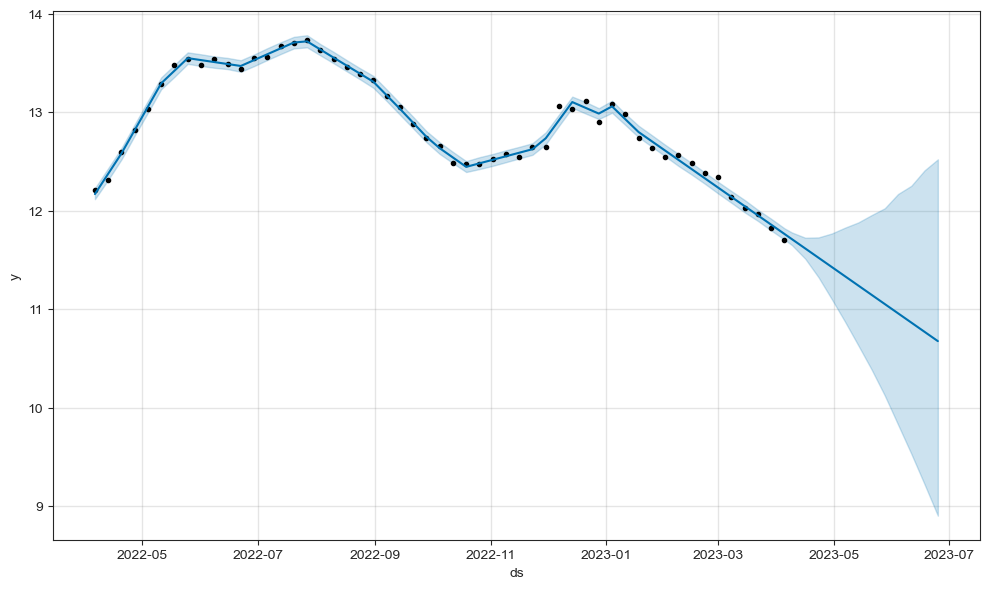

In [48]:
fig3 = model_log.plot(forecastlog)

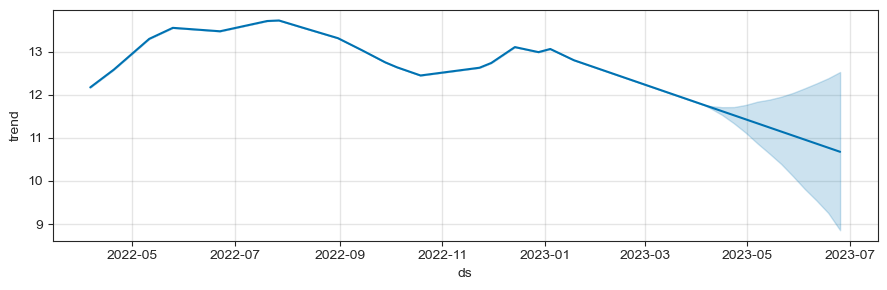

In [49]:
fig4 = model_log.plot_components(forecastlog)

In [50]:
forecastinvlog[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
60,2023-05-28,63016.611360,24872.326008,166794.722356
61,2023-06-04,57355.676585,18509.428394,192820.050452
62,2023-06-11,52203.277287,13762.124396,209590.123345
63,2023-06-18,47513.730493,10091.735800,245185.788361
64,2023-06-25,43245.457042,7338.925159,274192.873149


In [51]:
#Forecasts of first model
forecast_copy = forecast.copy()
forecast2 = forecast_copy.drop(columns=['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper'])
forecast2 = forecast2.rename(columns = {'ds':'Date', 'yhat':'Weekly Cases'})
forecast2

,Date,Weekly Cases
0,2022-04-06,687340.479640
1,2022-04-13,678333.370449
2,2022-04-20,669326.261258
3,2022-04-27,660319.152061
4,2022-05-04,651312.042861
...,...,...
60,2023-05-28,150668.926878
61,2023-06-04,141659.098112
62,2023-06-11,132649.269345
63,2023-06-18,123639.440578


In [52]:
#Forecasts of the inverted log model
forecastinvlog_copy = forecastinvlog.copy()
forecastinvlog2 = forecastinvlog_copy.drop(columns=['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper'])
forecastinvlog2 = forecastinvlog2.rename(columns = {'ds':'Date', 'yhat':'Weekly Cases'})
forecastinvlog2

,Date,Weekly Cases
0,2022-04-06,192714.360156
1,2022-04-13,236855.934935
2,2022-04-20,291108.217718
3,2022-04-27,369194.566100
4,2022-05-04,468238.429055
...,...,...
60,2023-05-28,63016.611360
61,2023-06-04,57355.676585
62,2023-06-11,52203.277287
63,2023-06-18,47513.730493


(0.0, 979025.4649762766)

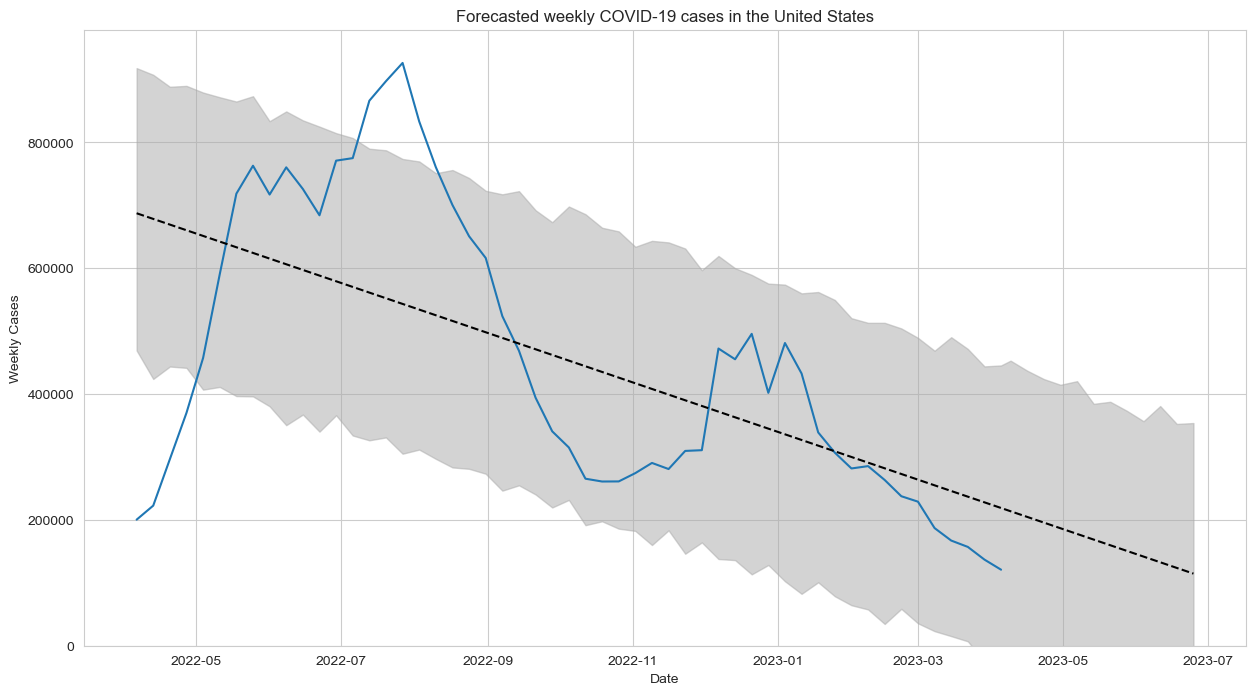

In [53]:
#Plotting the first model forecast
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_wc_fb, x='ds', y='y')
sns.lineplot(data=forecast, x='ds', y='yhat', color='black', linestyle='dashed', ax=ax1)
ax1.fill_between(forecast['ds'], forecast['yhat_upper'], forecast['yhat_lower'], alpha=0.5, color='darkgray')
ax1.set_title('Forecasted weekly COVID-19 cases in the United States')
ax1.set_ylabel('Weekly Cases')
ax1.set_xlabel('Date')
ax1.ticklabel_format(style='plain', axis = 'y')
ax1.set_ylim(bottom=0)

(0.0, 1015717.5265515136)

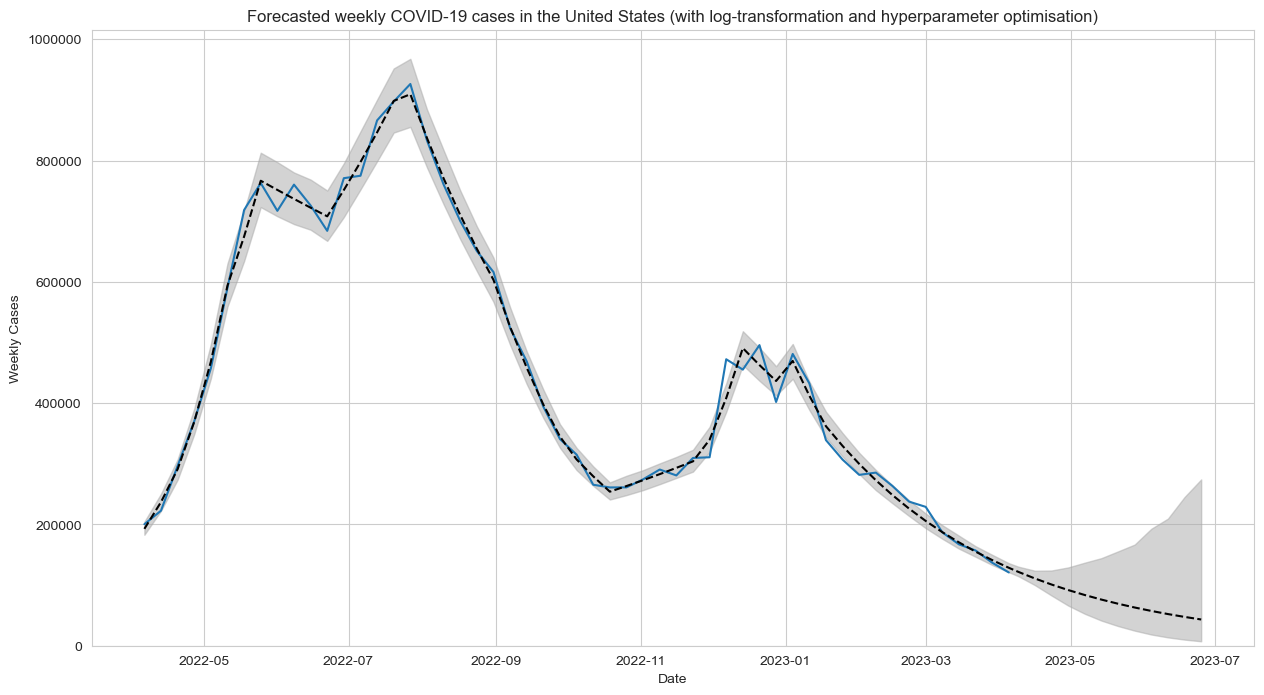

In [54]:
#Plotting the inverted log model forecast
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_wc_fb, x='ds', y='y')
sns.lineplot(data=forecastinvlog, x='ds', y='yhat', color='black', linestyle='dashed', ax=ax1)
ax1.fill_between(forecastinvlog['ds'], forecastinvlog['yhat_upper'], forecastinvlog['yhat_lower'], alpha=0.5, color='darkgray')
ax1.set_title('Forecasted weekly COVID-19 cases in the United States (with log-transformation and hyperparameter optimisation)')
ax1.set_ylabel('Weekly Cases')
ax1.set_xlabel('Date')
ax1.ticklabel_format(style='plain', axis = 'y')
ax1.set_ylim(bottom=0)